In [ ]:
#In this notebook we are going to focus on the age model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv("df_definitivo.csv")
data.head()
n_col = len(data.columns)
n = len(data)
features = data.columns

In [3]:
wage = data[["y_salary_m_hu", "age"]]
wage = pd.DataFrame(wage)

In [4]:
#Lets drop NA just for a minute
wage_clean = wage.dropna(subset=['y_salary_m_hu'])
len(wage_clean)
mean = np.mean(wage_clean)
maxi = np.max(wage_clean)

In [5]:
wage_graph= wage_clean[wage_clean["y_salary_m_hu"]<= 60000]

Text(0, 0.5, 'Frequency')

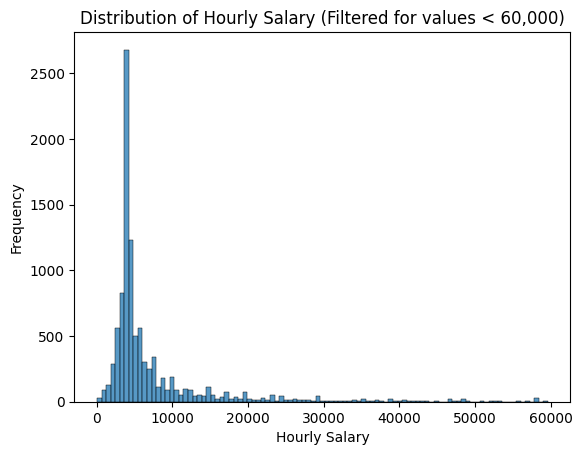

In [6]:
import seaborn as sns
sns.histplot(wage_graph['y_salary_m_hu'], bins=int(np.sqrt(len(wage_graph))), kde=False)

# Agregar título y etiquetas
plt.title("Distribution of Hourly Salary (Filtered for values < 60,000)")
plt.xlabel("Hourly Salary")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

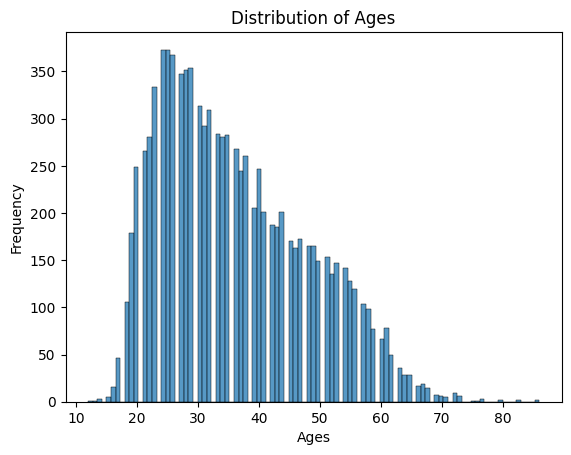

In [7]:
sns.histplot(wage_graph['age'], bins=int(np.sqrt(len(wage_graph))), kde=False)

# Agregar título y etiquetas
plt.title("Distribution of Ages")
plt.xlabel("Ages")
plt.ylabel("Frequency")


Text(0, 0.5, 'Frequency')

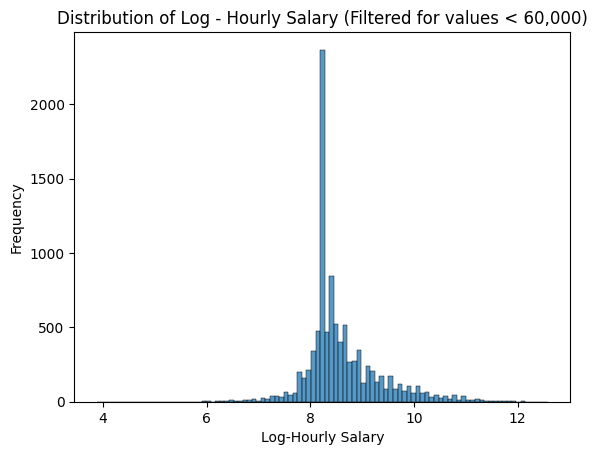

In [8]:
log_wage = np.log(wage_clean["y_salary_m_hu"])

log_wage_graph= log_wage[log_wage<= 60000]
sns.histplot(log_wage_graph, bins=int(np.sqrt(len(log_wage_graph))), kde=False)

# Agregar título y etiquetas
plt.title("Distribution of Log - Hourly Salary (Filtered for values < 60,000)")
plt.xlabel("Log-Hourly Salary")
plt.ylabel("Frequency")

# Modelo de Regresión Lineal por Edad

$log(w) = \beta_{1}+ \beta_{2} Age  + \beta_{2}Age^{2}+ u$

In [21]:
#Importamos la libreria para hacer la regresión
import sklearn
from sklearn.linear_model import LinearRegression

In [13]:
age = wage_clean["age"]
age_2 = age**2
log_wage

In [17]:
data = pd.DataFrame({
    'age': age,
    'age_2': age_2,
    'log_wage': log_wage
})

In [18]:
data

,age,age_2,log_wage
1,36,1296,8.815925
8,51,2601,8.671344
13,45,2025,8.030677
15,61,3721,8.314669
21,35,1225,9.019651
...,...,...,...
32164,24,576,8.526318
32166,50,2500,8.368764
32171,27,729,8.242152
32172,24,576,8.006368


In [23]:
X = data[['age', 'age_2']]  # Features
y = data['log_wage'] 

In [24]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [25]:
coefficients = model.coef_
intercept = model.intercept_

In [29]:
coefficients,intercept

(array([ 0.06501337, -0.00070827]), 7.292075518462848)

In [35]:
import statsmodels.api as sm

# Agregamos una constante (intercepto) al modelo
X_with_constant = sm.add_constant(X)

# Ajustamos el modelo de regresión usando OLS (Ordinary Least Squares)
model_ols = sm.OLS(y, X_with_constant).fit()

# Mostramos el resumen de la regresión
regression_summary_latex = model_ols.summary().as_latex()

# Imprimimos la tabla en formato LaTeX
print(regression_summary_latex)

\begin{center}
\begin{tabular}{lclc}
\toprule
\textbf{Dep. Variable:}    &    log\_wage     & \textbf{  R-squared:         } &     0.047   \\
\textbf{Model:}            &       OLS        & \textbf{  Adj. R-squared:    } &     0.047   \\
\textbf{Method:}           &  Least Squares   & \textbf{  F-statistic:       } &     244.4   \\
\textbf{Date:}             & Fri, 13 Sep 2024 & \textbf{  Prob (F-statistic):} & 2.51e-104   \\
\textbf{Time:}             &     11:20:48     & \textbf{  Log-Likelihood:    } &   -10718.   \\
\textbf{No. Observations:} &        9964      & \textbf{  AIC:               } & 2.144e+04   \\
\textbf{Df Residuals:}     &        9961      & \textbf{  BIC:               } & 2.146e+04   \\
\textbf{Df Model:}         &           2      & \textbf{                     } &             \\
\textbf{Covariance Type:}  &    nonrobust     & \textbf{                     } &             \\
\bottomrule
\end{tabular}
\begin{tabular}{lcccccc}
                & \textbf{coef} & \text

In [37]:
x_values = range(data['age'].min(), data['age'].max() + 1)

new_data = pd.DataFrame({
    'age': x_values,
    'age_2': [x**2 for x in x_values]
})

# Añadimos la constante para poder predecir con el modelo ajustado
new_data_with_constant = sm.add_constant(new_data)

# Realizamos las predicciones
new_data['predicted_log_wage'] = model_ols.predict(new_data_with_constant)

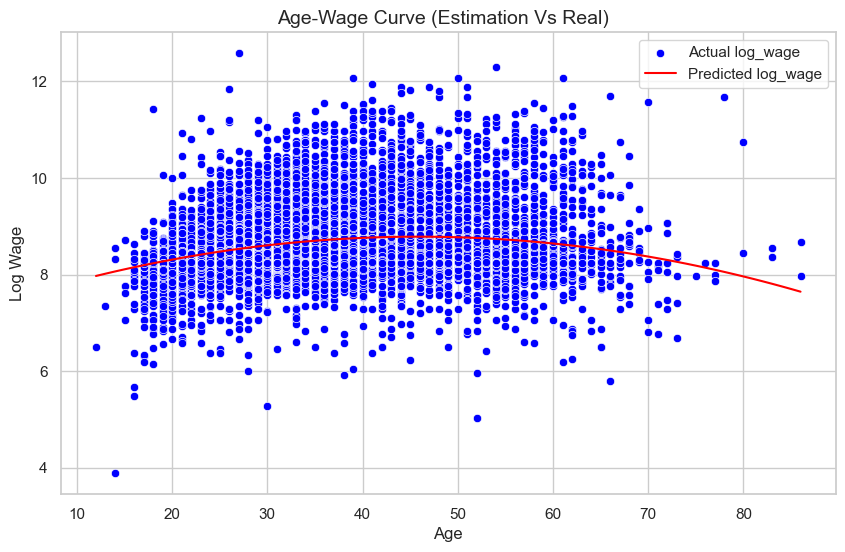

In [43]:
sns.set(style="whitegrid")

# Crear el gráfico con seaborn para hacer el gráfico más atractivo
plt.figure(figsize=(10, 6))

# Graficar los valores reales como scatter plot
sns.scatterplot(x='age', y='log_wage', data=data, color='blue', label='Actual log_wage')

# Graficar la línea de las predicciones
sns.lineplot(x='age', y='predicted_log_wage', data=new_data, color='red', label='Predicted log_wage')

# Añadir etiquetas y título con un estilo más atractivo
plt.xlabel('Age', fontsize=12)
plt.ylabel('Log Wage', fontsize=12)
plt.title('Age-Wage Curve (Estimation Vs Real)  ', fontsize=14)

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico estilizado
plt.show()

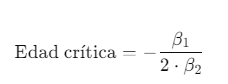

In [44]:
# Función para calcular el punto crítico (máximo de log_wage)
def calcular_edad_maxima(coefs):
    beta_1, beta_2 = coefs[0], coefs[1]
    edad_maxima = -beta_1 / (2 * beta_2)
    return edad_maxima

# Función de bootstrap para obtener el intervalo de confianza del punto crítico
def bootstrap_edad_maxima(df, n_iterations=1000):
    edades_maximas = []
    for _ in range(n_iterations):
        # Tomar una muestra bootstrap
        sample = df.sample(frac=1, replace=True)
        X_sample = sample[['age', 'age_2']]
        y_sample = sample['log_wage']
        
        # Ajustar el modelo de regresión para la muestra bootstrap
        model_bootstrap = sm.OLS(y_sample, sm.add_constant(X_sample)).fit()
        
        # Calcular la edad máxima para esta muestra bootstrap
        coefs = model_bootstrap.params[['age', 'age_2']]
        edad_maxima = calcular_edad_maxima(coefs)
        edades_maximas.append(edad_maxima)
    
    # Calcular el intervalo de confianza del 95%
    ci_lower = np.percentile(edades_maximas, 2.5)
    ci_upper = np.percentile(edades_maximas, 97.5)
    
    return ci_lower, ci_upper, np.mean(edades_maximas)

# Ejecutar el bootstrap para obtener el intervalo de confianza
ci_lower, ci_upper, edad_maxima_promedio = bootstrap_edad_maxima(data)

ci_lower, ci_upper, edad_maxima_promedio

C:\Users\a.ruedal\AppData\Local\Temp\ipykernel_18636\1684161279.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_1, beta_2 = coefs[0], coefs[1]
C:\Users\a.ruedal\AppData\Local\Temp\ipykernel_18636\1684161279.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_1, beta_2 = coefs[0], coefs[1]
C:\Users\a.ruedal\AppData\Local\Temp\ipykernel_18636\1684161279.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta_1, beta_2 =

(44.66293273767031, 47.58488498643255, 45.959584574025854)

In [68]:
peak_age = edad_maxima_promedio
peak = intercept + coefficients[0]*peak_age + coefficients[1]*peak_age**2
peak

8.78399401286866

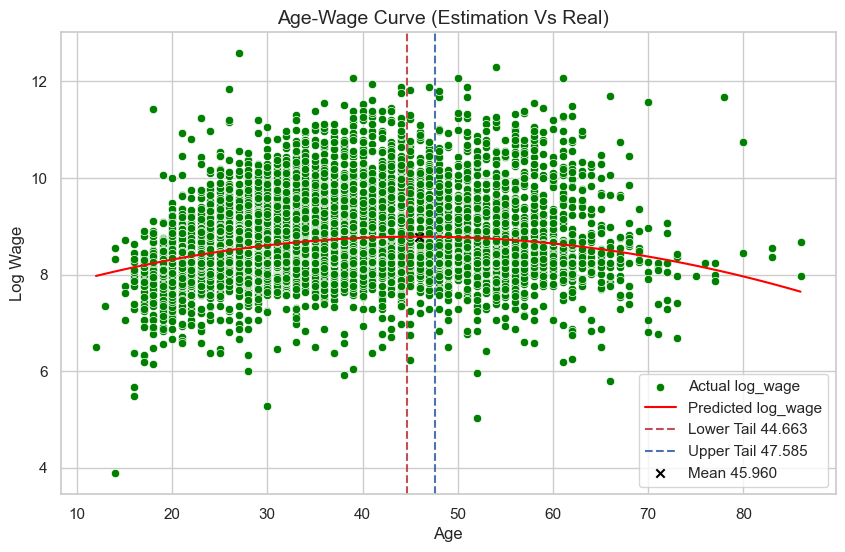

In [71]:
sns.set(style="whitegrid")

# Crear el gráfico con seaborn para hacer el gráfico más atractivo
plt.figure(figsize=(10, 6))

# Graficar los valores reales como scatter plot
sns.scatterplot(x='age', y='log_wage', data=data, color='green', label='Actual log_wage')

# Graficar la línea de las predicciones
sns.lineplot(x='age', y='predicted_log_wage', data=new_data, color='red', label='Predicted log_wage')

#Añadir los intervalos
plt.axvline(x=ci_lower, color='r', linestyle='--', label=f'Lower Tail {ci_lower:.3f}')
plt.axvline(x=ci_upper, color='b', linestyle='--', label=f'Upper Tail {ci_upper:.3f}')
plt.scatter(peak_age, peak, color = "black", marker = "x", label = f'Mean {peak_age:.3f}')

# Añadir etiquetas y título con un estilo más atractivo
plt.xlabel('Age', fontsize=12)
plt.ylabel('Log Wage', fontsize=12)
plt.title('Age-Wage Curve (Estimation Vs Real)  ', fontsize=14)

# Añadir la leyenda
plt.legend()

# Mostrar el gráfico estilizado
plt.show()